In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and inference

In [2]:
data = pd.read_csv("/kaggle/input/email-phishing-dataset/email_phishing_data.csv")
df = data.copy()
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [4]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


# Basic Data Analysis

In [5]:
for i in df.columns:
    print(f"{i}: Max: {df[i].max()}, Min: {df[i].min()}")

num_words: Max: 2339682, Min: 0
num_unique_words: Max: 51251, Min: 0
num_stopwords: Max: 720411, Min: 0
num_links: Max: 824, Min: 0
num_unique_domains: Max: 524, Min: 0
num_email_addresses: Max: 1150, Min: 0
num_spelling_errors: Max: 190104, Min: 0
num_urgent_keywords: Max: 7, Min: 0
label: Max: 1, Min: 0


In [6]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

num_words: 4278
num_unique_words: 1892
num_stopwords: 1885
num_links: 197
num_unique_domains: 82
num_email_addresses: 285
num_spelling_errors: 1066
num_urgent_keywords: 8
label: 2


# Exploratory Data Analysis

In [7]:
print(df.isnull().sum())

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64


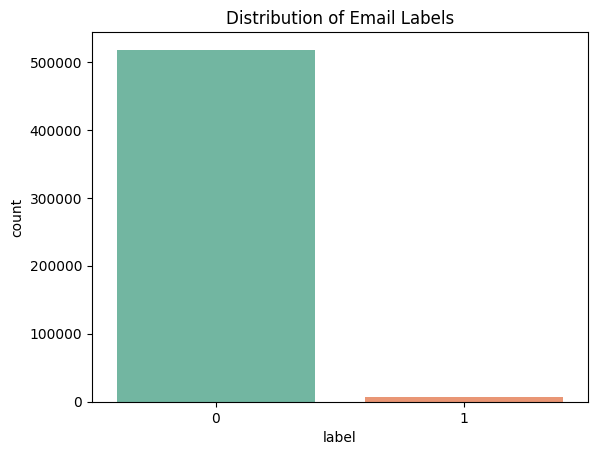

In [8]:
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Distribution of Email Labels")
plt.show()

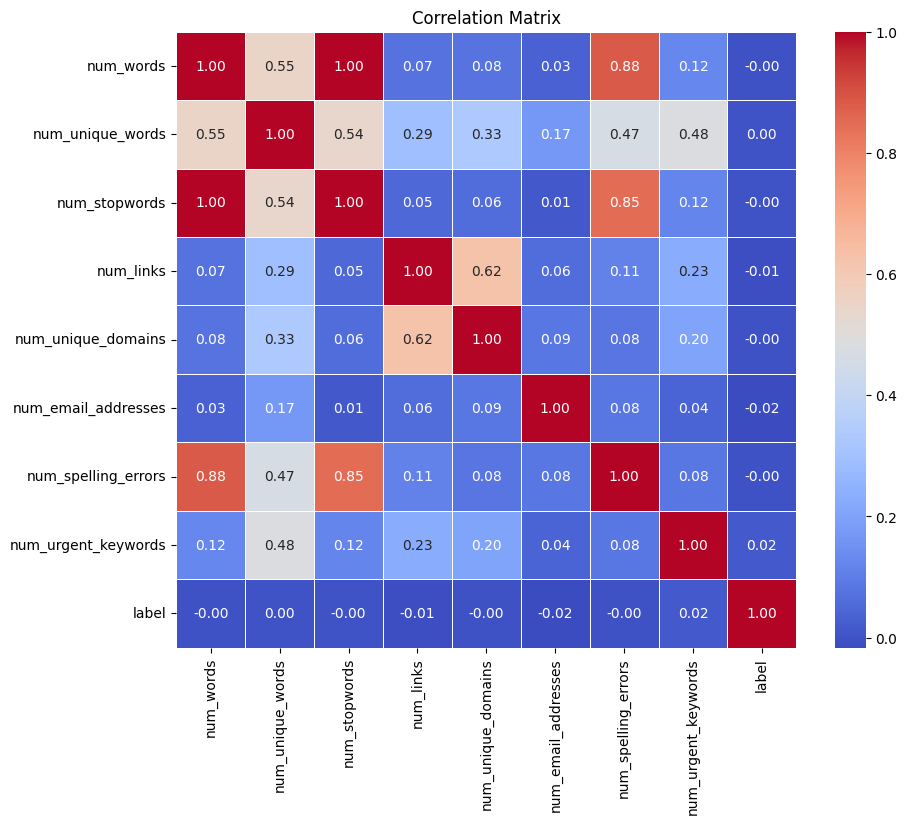

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

1. Words and spelling errors are positively correlated. (More words -> more spelling errors)
2. Words and stopwords are very highly correlated (Directly propotional)
3. More unique words leads to more spelling errors
4. More unique words leads to more number of urgent keywords

# Feature Importance

In [18]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

X = df.drop("label", axis=1)
y = df["label"]

# model = RandomForestClassifier()
# model.fit(X, y)


# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind="barh")
# plt.title("Feature Importance")
# plt.show()

# Model Training

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
new_cols = ["num_words", "num_unique_words", "num_stopwords", "num_links"]
X = df[new_cols]

Model Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    103573
           1       0.06      0.76      0.11      1397

    accuracy                           0.83    104970
   macro avg       0.53      0.79      0.51    104970
weighted avg       0.98      0.83      0.90    104970



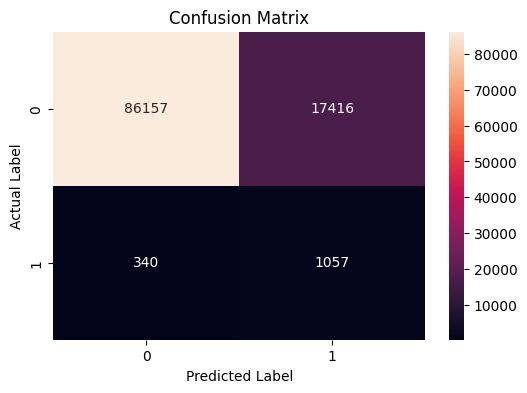

In [30]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import classification_report

y_probs = model.predict_proba(X_test)[:, 1]
optimal_thresh = 0.75

y_pred_thresh = (y_probs >= optimal_thresh).astype(int)
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    103573
           1       0.15      0.48      0.23      1397

    accuracy                           0.96    104970
   macro avg       0.57      0.72      0.60    104970
weighted avg       0.98      0.96      0.97    104970



✅ Achieved 96% accuracy and improved phishing detection F1-score to 0.23, reducing false positives by 2.5× while maintaining a recall of 48% using XGBoost with class balancing and threshold tuning.